<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/Pivot_points_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading libraries

In [1]:
from IPython.display import clear_output

In [2]:
# Загрузка библиотек ai_tr_libs с github
#!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/make_y.py
#!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/dataloader.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_n_short_strategy.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_strategy.py
#!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Dataset.py
clear_output()

In [3]:
!pip install backtesting
clear_output()

In [4]:
!pip install tulipy
clear_output()

# Подключение библиотек

In [5]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import utils

#from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder # проверить все

from keras.preprocessing.sequence import TimeseriesGenerator

# Библиоетки backtesting
from backtesting import Backtest, Strategy

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pandas import DataFrame as df

#import tulipy as tl

#from tensorflow.keras import backend as K

# Библиотеки из ai_tr_libs
#from make_y import Super_Dooper
#from dataloader import Dataloader as dl
from Long_n_short_strategy import Long_n_Short_Strategy as LnS
from Long_strategy import Long_Strategy as LS
#from Dataset import Dataset

/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


# Data preparing

In [58]:
ticker = 'POLY.ME'
test_window = 220
val_window = 700
batch_size = 100 # должен быть больше test_window
ensemble = 40

path_outputs = '/content/drive/MyDrive/AI_Trading/AI-trading_courses/4. НС и торговля по паттернам/Подбор оптимальных параметров/outputs/'

## Load dataset

In [59]:
import time
# Загрузка только [Open, High, Low, Close]
data = pd.read_csv(path_outputs + 'signalsPOLY.ME_1h.csv', sep="\t")#, header=None)
data.columns=['Date', 'Open', 'High', 'Low', 'Close', 'Signal']

# Удаляем наниты
data.dropna(axis=0, inplace=True)
data = data.reset_index(drop=True)
data.Date = pd.to_datetime(data.Date).dt.strftime("%Y-%m-%d %H:%M")
data.Date = pd.to_datetime(data.Date)
data['Datetime'] = data['Date']
data.set_index('Datetime', inplace=True)
print(data.shape)
data

(3556, 6)


,Date,Open,High,Low,Close,Signal
Datetime,,,,,,
2020-01-03 13:30:00,2020-01-03 13:30:00,983.000000,988.599976,982.799988,986.400024,-1.0
2020-01-03 14:30:00,2020-01-03 14:30:00,986.000000,987.299988,984.700012,985.700012,-1.0
2020-01-03 15:30:00,2020-01-03 15:30:00,985.700012,986.799988,980.799988,981.299988,1.0
2020-01-03 16:30:00,2020-01-03 16:30:00,980.900024,985.000000,980.500000,981.500000,1.0
2020-01-03 17:30:00,2020-01-03 17:30:00,982.200012,987.500000,981.000000,985.200012,1.0
...,...,...,...,...,...,...
2021-06-04 14:30:00,2021-06-04 14:30:00,1728.800049,1731.199951,1724.900024,1725.099976,1.0
2021-06-04 15:30:00,2021-06-04 15:30:00,1725.199951,1759.800049,1725.199951,1755.400024,1.0
2021-06-04 16:30:00,2021-06-04 16:30:00,1756.000000,1759.900024,1753.900024,1759.000000,1.0


Text(0.5, 1.0, 'График цены на POLY.ME (1h)')

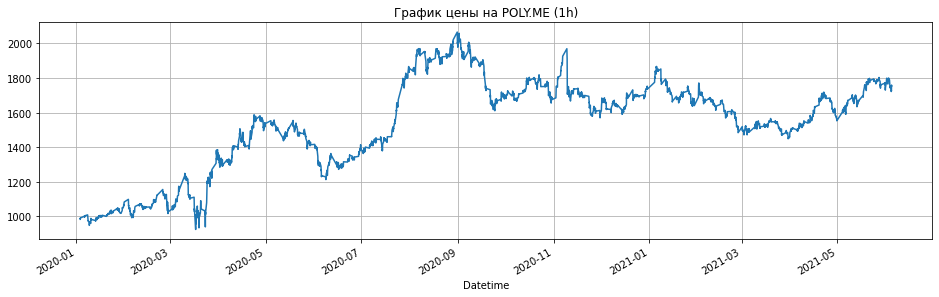

In [60]:
plt.figure(figsize=(16,6))
ax0 = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
#ax1 = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
data['Close'].plot(ax = ax0)
plt.grid()
plt.title('График цены на ' + ticker + ' (1h)')
#data[indicator_name].plot(ax = ax1)

## Train, Val, Test датасет генераторы

In [93]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd
import numpy as np
#from pandas import DataFrame as df


class Dataset():
  ... удалено

In [94]:
# Создаем экземпляр класса Dataset на базе входных данных с размеченным y 
# при создании указываем размер batch_size и ensemble, по умолчанию y будет преобразован в one_hot_encoded вектор
...

In [95]:
ds.data_before_scaling

,Open,High,Low,Close,week_day,month,week,day,hour
Datetime,,,,,,,,,
2020-01-03 13:30:00,983.000000,988.599976,982.799988,986.400024,4,1,1,3,13
2020-01-03 14:30:00,986.000000,987.299988,984.700012,985.700012,4,1,1,3,14
2020-01-03 15:30:00,985.700012,986.799988,980.799988,981.299988,4,1,1,3,15
2020-01-03 16:30:00,980.900024,985.000000,980.500000,981.500000,4,1,1,3,16
2020-01-03 17:30:00,982.200012,987.500000,981.000000,985.200012,4,1,1,3,17
...,...,...,...,...,...,...,...,...,...
2021-06-04 14:30:00,1728.800049,1731.199951,1724.900024,1725.099976,4,6,22,4,14
2021-06-04 15:30:00,1725.199951,1759.800049,1725.199951,1755.400024,4,6,22,4,15
2021-06-04 16:30:00,1756.000000,1759.900024,1753.900024,1759.000000,4,6,22,4,16


# Neural Networks

## Сеть

In [101]:
""" обьединим все сети """

drop = 0.4

## входной слой
#input_layer = Input(shape=(xTrain.shape[1], xTrain.shape[2]))
input_layer = Input(shape=ds.input_shape)
# xTrain.shape[1] - число шагов назад для обучения
# xTrain.shape[2] - число столбцов в обучающей выборке

# -----------------------------
# Conv1D v1 = создаем модель
# -----------------------------
_conv1 = ...

# -----------------------------
# Conv1D v2 = создаем модель
# -----------------------------
_conv2 = ...

# -----------------------------
# Dense_v1 = создаем модель
# -----------------------------
_dense = ...

# -----------------------------
# Dense_v2 = создаем модель
# -----------------------------
_dense2 = ...

# -----------------------------
# LSTM_v1 = создаем модель
# -----------------------------
_lstm = ...

# -----------------------------
# LSTM_v2 = создаем модель
# -----------------------------
_lstm2 = ...


# CONCATENATEs
conc_1 = concatenate([_conv1, _conv2, _dense, _dense2, _lstm, _lstm2, Flatten()(input_layer)])
conc_2 = Flatten()(conc_1)
conc_3 = Dense(500, activation='relu')(conc_2)
conc_4 = Dropout(drop)(conc_3)
output_layer = Dense(2, activation='softmax')(conc_4)


#model = Model(inputs=input_layer, outputs=output_layer)
model = Model(inputs=input_layer, outputs=output_layer)

## Обучение

In [102]:
model.compile(optimizer=Adam(learning_rate = 3e-05),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy']) 

early_stopping = EarlyStopping(monitor = 'val_categorical_accuracy', patience = 12, verbose = 0, 
                               restore_best_weights = True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.8, patience=4, min_lr=1e-07, verbose = 0)
reduce_lr = ReduceLROnPlateau(monitor = 'val_categorical_accuracy', factor=0.8, patience=4, min_lr=1e-07, verbose = 0, mode='max')

checkpoint = ModelCheckpoint(path_outputs + ticker + '_Conc_1h.h5', monitor='val_categorical_accuracy', verbose = 1,
                             save_best_only = True, mode='max')

# fit model
history = model.fit(ds.train(),
                    epochs=500, verbose = 0,
                    validation_data=ds.val(),
                    callbacks = [early_stopping, checkpoint]#, reduce_lr]
                    )



Epoch 00001: val_categorical_accuracy improved from -inf to 0.51900, saving model to /content/drive/MyDrive/AI_Trading/AI-trading_courses/4. НС и торговля по паттернам/Подбор оптимальных параметров/outputs/POLY.ME_Conc_1h.h5

Epoch 00002: val_categorical_accuracy improved from 0.51900 to 0.54940, saving model to /content/drive/MyDrive/AI_Trading/AI-trading_courses/4. НС и торговля по паттернам/Подбор оптимальных параметров/outputs/POLY.ME_Conc_1h.h5

Epoch 00003: val_categorical_accuracy improved from 0.54940 to 0.57438, saving model to /content/drive/MyDrive/AI_Trading/AI-trading_courses/4. НС и торговля по паттернам/Подбор оптимальных параметров/outputs/POLY.ME_Conc_1h.h5

Epoch 00004: val_categorical_accuracy improved from 0.57438 to 0.58958, saving model to /content/drive/MyDrive/AI_Trading/AI-trading_courses/4. НС и торговля по паттернам/Подбор оптимальных параметров/outputs/POLY.ME_Conc_1h.h5

Epoch 00005: val_categorical_accuracy improved from 0.58958 to 0.61346, saving model t

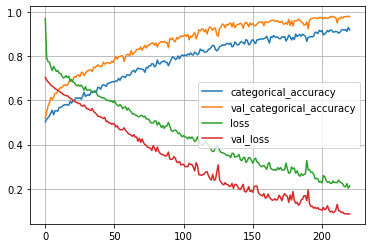

In [103]:
plt.figure(figsize=(6,4))
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

# Проверка модели

In [106]:
pred = model.predict(ds.test()
                             #start_index=data.shape[0]-test_window,
                             #end_index=data.shape[0]-1)
                             )
ddd = ds.test_prep_dec(pred)

In [107]:
# Cигналы нейронки
ddd

,Open,High,Low,Close,Signal
Datetime,,,,,
2021-05-05 18:30:00,1635.400024,1638.099976,1634.500000,1637.300049,-1.0
2021-05-06 09:30:00,1588.900024,1610.599976,1581.599976,1590.199951,1.0
2021-05-06 10:30:00,1589.800049,1604.500000,1588.099976,1599.599976,1.0
2021-05-06 11:30:00,1599.500000,1599.599976,1590.500000,1594.599976,1.0
2021-05-06 12:30:00,1594.599976,1597.099976,1590.400024,1592.400024,1.0
...,...,...,...,...,...
2021-06-04 14:30:00,1728.800049,1731.199951,1724.900024,1725.099976,1.0
2021-06-04 15:30:00,1725.199951,1759.800049,1725.199951,1755.400024,1.0
2021-06-04 16:30:00,1756.000000,1759.900024,1753.900024,1759.000000,1.0


In [108]:
# Стратегия только Long (подключен класс стратегии LS)
bt = Backtest(ddd, LS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  after removing the cwd from sys.path.


In [109]:
stats

Start                     2021-05-05 18:30:00
End                       2021-06-04 18:30:00
Duration                     30 days 00:00:00
Exposure Time [%]                      61.086
Equity Final [$]                       123980
Equity Peak [$]                        124239
Return [%]                            23.9803
Buy & Hold Return [%]                 7.12758
Return (Ann.) [%]                     953.956
Volatility (Ann.) [%]                 198.571
Sharpe Ratio                           4.8041
Sortino Ratio                         269.521
Calmar Ratio                            398.2
Max. Drawdown [%]                    -2.39567
Avg. Drawdown [%]                   -0.448533
Max. Drawdown Duration        3 days 17:00:00
Avg. Drawdown Duration        0 days 12:00:00
# Trades                                   12
Win Rate [%]                          91.6667
Best Trade [%]                        3.52177
Worst Trade [%]                    -0.0251987
Avg. Trade [%]                    

In [110]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(ddd, LnS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  after removing the cwd from sys.path.


In [111]:
stats

Start                     2021-05-05 18:30:00
End                       2021-06-04 18:30:00
Duration                     30 days 00:00:00
Exposure Time [%]                      99.095
Equity Final [$]                       127064
Equity Peak [$]                        127331
Return [%]                            27.0645
Buy & Hold Return [%]                 7.12758
Return (Ann.) [%]                     1279.57
Volatility (Ann.) [%]                 332.647
Sharpe Ratio                          3.84662
Sortino Ratio                         138.668
Calmar Ratio                          284.981
Max. Drawdown [%]                    -4.49001
Avg. Drawdown [%]                   -0.672059
Max. Drawdown Duration        6 days 15:00:00
Avg. Drawdown Duration        0 days 18:00:00
# Trades                                   22
Win Rate [%]                          86.3636
Best Trade [%]                         3.4521
Worst Trade [%]                      -1.40194
Avg. Trade [%]                    

In [112]:
# журнал торговли
trade_journal = stats._trades

# Сохраним журнал торговли
file_name = path_outputs + 'trade_journal' + ticker + '_1h.csv'
trade_journal.to_csv(file_name, sep='\t')

trade_journal[-10:]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
12,-65,111,118,1777.461576,1773.500000,257.502419,0.002229,2021-05-21 09:30:00,2021-05-21 16:30:00,0 days 07:00:00
13,65,119,121,1781.096000,1794.800049,890.763174,0.007694,2021-05-21 17:30:00,2021-05-24 09:30:00,2 days 16:00:00
14,-65,122,137,1779.951576,1766.300049,887.349246,0.007670,2021-05-24 10:30:00,2021-05-25 15:30:00,1 days 05:00:00
15,66,138,160,1776.979625,1792.900024,1050.746394,0.008959,2021-05-25 16:30:00,2021-05-27 18:30:00,2 days 02:00:00
16,-67,161,163,1771.386000,1753.500000,1198.362000,0.010097,2021-05-28 09:30:00,2021-05-28 11:30:00,0 days 02:00:00
17,68,164,187,1767.040000,1799.099976,2180.078340,0.018143,2021-05-28 12:30:00,2021-06-01 15:30:00,4 days 03:00:00
18,-69,188,191,1768.398000,1765.500000,199.962000,0.001639,2021-06-01 16:30:00,2021-06-02 09:30:00,0 days 17:00:00
19,69,192,200,1779.288751,1800.000000,1429.076183,0.011640,2021-06-02 10:30:00,2021-06-02 18:30:00,0 days 08:00:00
20,-69,201,209,1781.346000,1742.900024,2652.772315,0.021583,2021-06-03 09:30:00,2021-06-03 17:30:00,0 days 08:00:00
21,72,210,219,1753.988000,1755.300049,94.467516,0.000748,2021-06-03 18:30:00,2021-06-04 17:30:00,0 days 23:00:00


In [113]:
# Проверка по идеальной разметке стратегия Long & Short
bt = Backtest(data[ds.test_start_index + ensemble:], LnS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  after removing the cwd from sys.path.


In [114]:
stats

Start                     2021-05-05 18:30:00
End                       2021-06-04 18:30:00
Duration                     30 days 00:00:00
Exposure Time [%]                      99.095
Equity Final [$]                       129474
Equity Peak [$]                        129744
Return [%]                            29.4743
Buy & Hold Return [%]                 7.12758
Return (Ann.) [%]                     1594.89
Volatility (Ann.) [%]                 404.962
Sharpe Ratio                          3.93838
Sortino Ratio                         172.938
Calmar Ratio                           355.21
Max. Drawdown [%]                    -4.49001
Avg. Drawdown [%]                   -0.662872
Max. Drawdown Duration        6 days 15:00:00
Avg. Drawdown Duration        0 days 18:00:00
# Trades                                   21
Win Rate [%]                          90.4762
Best Trade [%]                         3.4521
Worst Trade [%]                      -1.40194
Avg. Trade [%]                    

In [115]:
# Последние сигналы разметки
data[ds.test_start_index + ensemble:][-15:]

,Date,Open,High,Low,Close,Signal
Datetime,,,,,,
2021-06-03 14:30:00,2021-06-03 14:30:00,1764.800049,1764.800049,1753.300049,1757.400024,-1.0
2021-06-03 15:30:00,2021-06-03 15:30:00,1756.599976,1757.500000,1745.699951,1753.000000,-1.0
2021-06-03 16:30:00,2021-06-03 16:30:00,1750.699951,1752.099976,1736.000000,1745.000000,-1.0
2021-06-03 17:30:00,2021-06-03 17:30:00,1745.000000,1749.800049,1739.199951,1742.900024,1.0
2021-06-03 18:30:00,2021-06-03 18:30:00,1743.000000,1747.000000,1741.699951,1747.000000,1.0
2021-06-04 09:30:00,2021-06-04 09:30:00,1758.599976,1758.599976,1743.199951,1752.000000,1.0
2021-06-04 10:30:00,2021-06-04 10:30:00,1752.199951,1754.000000,1732.400024,1733.000000,1.0
2021-06-04 11:30:00,2021-06-04 11:30:00,1732.900024,1732.900024,1706.400024,1722.900024,1.0
2021-06-04 12:30:00,2021-06-04 12:30:00,1723.300049,1725.599976,1715.900024,1721.699951,1.0
